# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations (will use numpy for random lats & lngs)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# list of city data
city_data = []

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group the cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        # reset the group every 50 counts of cities
        set_count += 1
        record_count = 1
        
    # create the endpoint url for each city
    city_url = f"{url}&q={city}"
    
    # log the city of group and the set number
    print(f"Processing city #{record_count} in group#{set_count} | {city}")
    record_count += 1
    
    try:
        # run API requests and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # add a time delay to avoid blowing out the API key
        time.sleep(2)
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        # if an error occurs when making the API all, skip the city
        print(f"{city} has an error. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing city #1 in group#1 | kushmurun
Processing city #2 in group#1 | goma
Processing city #3 in group#1 | bluff
Processing city #4 in group#1 | ponta do sol
Processing city #5 in group#1 | busselton
Processing city #6 in group#1 | teya
Processing city #7 in group#1 | tasiilaq
Processing city #8 in group#1 | ushuaia
Processing city #9 in group#1 | hobart
Processing city #10 in group#1 | umzimvubu
umzimvubu has an error. Skipping...
Processing city #11 in group#1 | bathsheba
Processing city #12 in group#1 | punta arenas
Processing city #13 in group#1 | saint-philippe
Processing city #14 in group#1 | albany
Processing city #15 in group#1 | khatanga
Processing city #16 in group#1 | provideniya
Processing city #17 in group#1 | mudgee
Processing city #18 in group#1 | rikitea
Processing city #19 in group#1 | faanui
Processing city #20 in group#1 | kapaa
Processing city #21 in group#1 | haines junction
Processing city #22 in grou

Processing city #31 in group#4 | leningradskiy
Processing city #32 in group#4 | chicama
Processing city #33 in group#4 | xucheng
Processing city #34 in group#4 | kahului
Processing city #35 in group#4 | codrington
Processing city #36 in group#4 | antsirabe
Processing city #37 in group#4 | yar-sale
Processing city #38 in group#4 | kamenka
Processing city #39 in group#4 | fairbanks
Processing city #40 in group#4 | honningsvag
Processing city #41 in group#4 | vila franca do campo
Processing city #42 in group#4 | knoxville
Processing city #43 in group#4 | pevek
Processing city #44 in group#4 | port keats
Processing city #45 in group#4 | ribeira grande
Processing city #46 in group#4 | presidencia roque saenz pena
Processing city #47 in group#4 | ilulissat
Processing city #48 in group#4 | castro
Processing city #49 in group#4 | tsihombe
tsihombe has an error. Skipping...
Processing city #50 in group#4 | jackson
Processing city #1 in group#5 | mazara del vallo
Processing city #2 in group#5 | 

Processing city #12 in group#8 | shingu
Processing city #13 in group#8 | hanna
Processing city #14 in group#8 | ketchikan
Processing city #15 in group#8 | cabatuan
Processing city #16 in group#8 | sao felix do xingu
Processing city #17 in group#8 | huarmey
Processing city #18 in group#8 | carutapera
Processing city #19 in group#8 | sao joaquim
Processing city #20 in group#8 | grand gaube
Processing city #21 in group#8 | bargal
bargal has an error. Skipping...
Processing city #22 in group#8 | los llanos de aridane
Processing city #23 in group#8 | narsaq
Processing city #24 in group#8 | ossora
Processing city #25 in group#8 | bambous virieux
Processing city #26 in group#8 | kuche
kuche has an error. Skipping...
Processing city #27 in group#8 | wanxian
Processing city #28 in group#8 | clyde river
Processing city #29 in group#8 | bonito
Processing city #30 in group#8 | trapani
Processing city #31 in group#8 | kananga
Processing city #32 in group#8 | vengerovo
Processing city #33 in group#8

Processing city #44 in group#11 | pingliang
Processing city #45 in group#11 | santa maria
Processing city #46 in group#11 | tucuman
Processing city #47 in group#11 | khonsa
Processing city #48 in group#11 | buritis
Processing city #49 in group#11 | shaki
Processing city #50 in group#11 | ugoofaaru
Processing city #1 in group#12 | ilava
Processing city #2 in group#12 | fort nelson
Processing city #3 in group#12 | portobelo
Processing city #4 in group#12 | saldanha
Processing city #5 in group#12 | fort saint james
Processing city #6 in group#12 | ladario
Processing city #7 in group#12 | itupiranga
Processing city #8 in group#12 | halalo
halalo has an error. Skipping...
Processing city #9 in group#12 | marzuq
Processing city #10 in group#12 | urfa
urfa has an error. Skipping...
Processing city #11 in group#12 | margate
Processing city #12 in group#12 | sao filipe
Processing city #13 in group#12 | aleysk
Processing city #14 in group#12 | santa rosa de cabal
Processing city #15 in group#12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kushmurun,52.4503,64.6311,66.38,66,10,8.10,KZ,1660163044
1,goma,-1.6792,29.2228,65.34,63,62,2.55,CD,1660163046
2,bluff,-46.6000,168.3333,41.68,69,98,8.10,NZ,1660163048
3,ponta do sol,32.6667,-17.1000,73.71,77,50,5.91,PT,1660162452
4,busselton,-33.6500,115.3333,51.62,80,40,4.56,AU,1660163053


In [12]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,20.699100,14.837476,69.999122,69.937843,52.853748,8.126600,1.660164e+09
std,33.279567,89.489058,14.099735,20.872888,39.964460,5.529115,4.200405e+02
min,-54.800000,-175.200000,33.300000,8.000000,0.000000,0.000000,1.660162e+09
25%,-8.115050,-63.040500,58.810000,58.000000,9.000000,3.960000,1.660163e+09
50%,26.124700,18.423200,72.280000,75.000000,55.000000,6.910000,1.660164e+09
75%,47.835500,94.508350,80.550000,87.000000,98.000000,11.160000,1.660164e+09
max,78.218600,178.416700,104.630000,100.000000,100.000000,32.440000,1.660164e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Get the indices of cities that have humidity over 100%
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print(dirty_city_data)

Int64Index([], dtype='int64')


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kushmurun,52.4503,64.6311,66.38,66,10,8.10,KZ,1660163044
1,goma,-1.6792,29.2228,65.34,63,62,2.55,CD,1660163046
2,bluff,-46.6000,168.3333,41.68,69,98,8.10,NZ,1660163048
3,ponta do sol,32.6667,-17.1000,73.71,77,50,5.91,PT,1660162452
4,busselton,-33.6500,115.3333,51.62,80,40,4.56,AU,1660163053


In [16]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

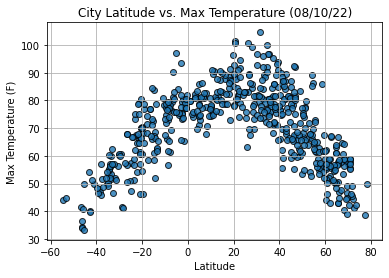

In [17]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

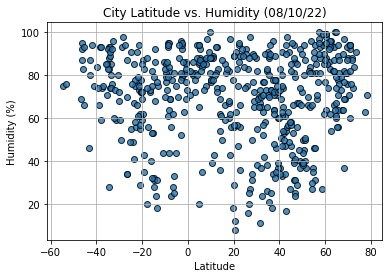

In [18]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

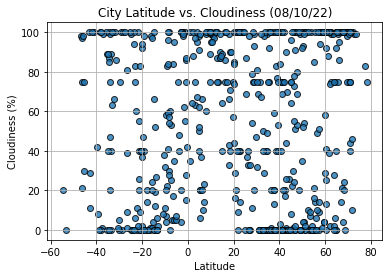

In [19]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

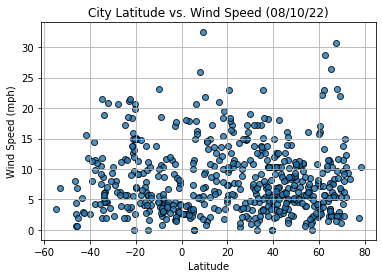

In [20]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [28]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # run a regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere Dataframes
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4969101214618367


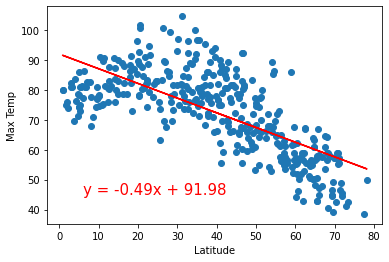

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,45))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6814403368297192


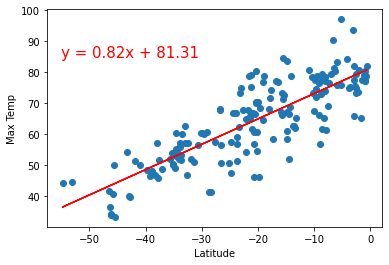

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,85))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0031603631763265547


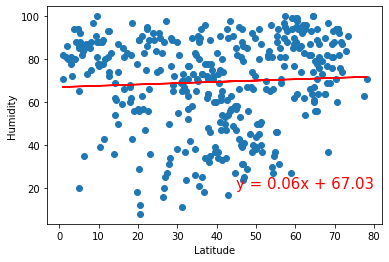

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.016339573213077104


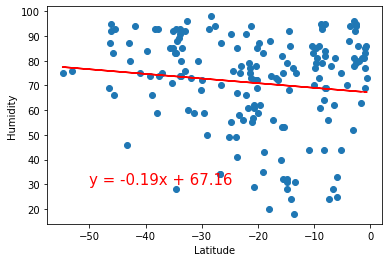

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005995962167205208


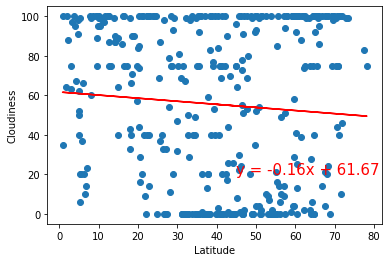

In [40]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002675992386963467


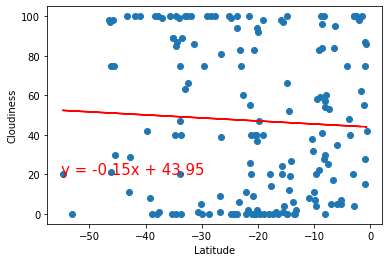

In [42]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009422720263058465


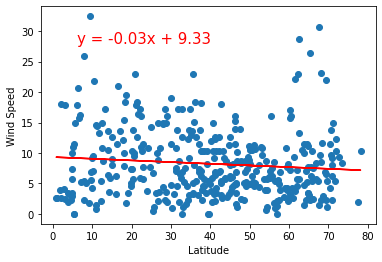

In [44]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,28))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003214138297916542


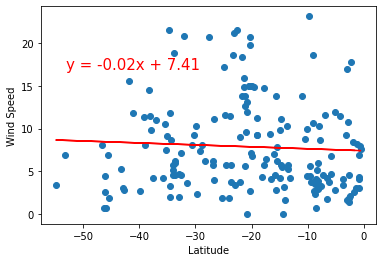

In [47]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-53,17))